### History Time
Let's contextualise
1. Traditional NLP (Convert words into numbers followed by traditional ML) (1990-2010)
2. Word2Vec (A better approach for converting words into numbers)(2013)
3. Followed by combining Word2Vec with Deep neural networks (2014-17)
4. Attention is all you need !! (Transformer models) (2017-Now, i guess ^_^ )

Word2Vec with Deep neural networks
- Use word2vec, get vectors, average them together, fit a classifier
- Use keras, initialise random embeddings, train a classifier and embeddings together 
- Use keras, use Word2vec embeddings, tell keras to train the classifier and not touch the embeddings
- Use keras, use Word2vec embeddings, tell keras to train the classifier and the embeddings on top

# Named Entity Recognition
- Dictionary Based
- Rule Based 
- ML Based
- Deep learning Based

### Recurrent Neural Networks 
Create for sequencial data 

![](https://karpathy.github.io/assets/rnn/diags.jpeg)

### Architecture of a RNN

![](https://miro.medium.com/v2/resize:fit:224/format:webp/1*Jjtbhw57TVmnYFB6coxE7Q.png)

### How is this different than a normal nerual network
![](https://miro.medium.com/v2/resize:fit:500/format:webp/1*Ek9T_0gEyHtiwNCu6jU20w.gif)

# RNN's - An Intro

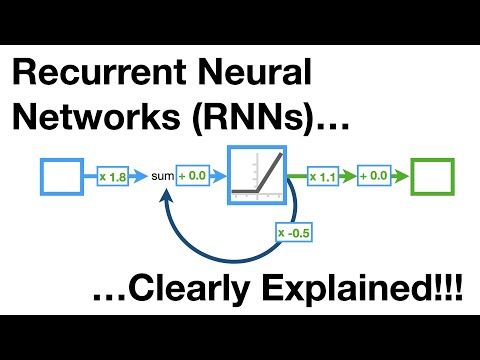

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('AsNTP8Kwu80', width=800, height=300)

### Let's learn with the help of an example

Let's take <a href = "https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021">this</a> dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("AAPL.csv")

In [4]:
df

Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100323   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095089   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088110   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090291   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092908   
...           ...         ...         ...         ...         ...         ...   
10404  2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
10405  2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
10406  2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
10407  2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
10408  2022-03-24  171.059998  174.139999  170.210007  174.070007  174.070007   

          Volume  
0      469033600  
1      175884800  
2      105728000  
3       86441600  
4       73449600  
...          ...  
10404  123351200  
10405   95811400  
10406   81532000  
10407   98062700  
10408   90018700  

[10409 rows x 7 columns]

### Only interested in the Open column

In [5]:
df_open = df[['Date','Open']]

In [7]:
df_open

Date        Open
0      1980-12-12    0.128348
1      1980-12-15    0.122210
2      1980-12-16    0.113281
3      1980-12-17    0.115513
4      1980-12-18    0.118862
...           ...         ...
10404  2022-03-18  160.509995
10405  2022-03-21  163.509995
10406  2022-03-22  165.509995
10407  2022-03-23  167.990005
10408  2022-03-24  171.059998

[10409 rows x 2 columns]

In [10]:
df_open['Open'].plot()

<Axes: >

### Fixing my dates

In [11]:
df_open

Date        Open
0      1980-12-12    0.128348
1      1980-12-15    0.122210
2      1980-12-16    0.113281
3      1980-12-17    0.115513
4      1980-12-18    0.118862
...           ...         ...
10404  2022-03-18  160.509995
10405  2022-03-21  163.509995
10406  2022-03-22  165.509995
10407  2022-03-23  167.990005
10408  2022-03-24  171.059998

[10409 rows x 2 columns]

In [12]:
df_open['Date'] = pd.to_datetime(df_open['Date'])

/tmp/ipykernel_294/4044307749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['Date'] = pd.to_datetime(df_open['Date'])


In [17]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10409 non-null  datetime64[ns]
 1   Open    10409 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 162.8 KB


In [20]:
df_open['Open'].plot()

<Axes: >

### Splitting in train and validation

In [22]:
df_open.shape

(10409, 2)

In [23]:
len_data = df_open.shape[0]

In [30]:
train_ratio = 0.9
train_num = round(len_data*train_ratio)
train_num

9368

In [31]:
train_data = df_open[:train_num]
val_data = df_open[train_num:]

In [33]:
print(len(train_data))
print(len(val_data))

9368
1041


In [36]:
train_data

Date       Open
0    1980-12-12   0.128348
1    1980-12-15   0.122210
2    1980-12-16   0.113281
3    1980-12-17   0.115513
4    1980-12-18   0.118862
...         ...        ...
9363 2018-01-30  41.382500
9364 2018-01-31  41.717499
9365 2018-02-01  41.792500
9366 2018-02-02  41.500000
9367 2018-02-05  39.775002

[9368 rows x 2 columns]

### Creating training data

In [37]:
dataset_train = train_data['Open']
dataset_train.shape

(9368,)

In [39]:
dataset_train

0        0.128348
1        0.122210
2        0.113281
3        0.115513
4        0.118862
          ...    
9363    41.382500
9364    41.717499
9365    41.792500
9366    41.500000
9367    39.775002
Name: Open, Length: 9368, dtype: float64

### Reshaping

As i want a dataframe

In [40]:
# 1 way
dataset_train.values.reshape(-1,1)

array([[ 0.128348],
       [ 0.12221 ],
       [ 0.113281],
       ...,
       [41.7925  ],
       [41.5     ],
       [39.775002]])

In [41]:
dataset_train = dataset_train.values.reshape(-1,1)
dataset_train

array([[ 0.128348],
       [ 0.12221 ],
       [ 0.113281],
       ...,
       [41.7925  ],
       [41.5     ],
       [39.775002]])

In [42]:
dataset_train.shape

(9368, 1)

In [44]:
# Here is my validation, we will look at you later after i have trained my model. For now, you go away
val_data

Date        Open
9368  2018-02-06   38.707500
9369  2018-02-07   40.772499
9370  2018-02-08   40.072498
9371  2018-02-09   39.267502
9372  2018-02-12   39.625000
...          ...         ...
10404 2022-03-18  160.509995
10405 2022-03-21  163.509995
10406 2022-03-22  165.509995
10407 2022-03-23  167.990005
10408 2022-03-24  171.059998

[1041 rows x 2 columns]

### Creating my training data

What kind of format do i want, let's see

In [45]:
dataset_train

array([[ 0.128348],
       [ 0.12221 ],
       [ 0.113281],
       ...,
       [41.7925  ],
       [41.5     ],
       [39.775002]])

In [46]:
# Number of training samples i have
train_num

9368

In [52]:
# Initialising 3 variables

X_train = []
y_train = []

time_step = 50

In [54]:
for i in range(time_step, train_num):
    X_train.append(dataset_train[i-time_step:i,0])
    y_train.append(dataset_train[i,0])

In [55]:
X_train

[array([0.128348, 0.12221 , 0.113281, 0.115513, 0.118862, 0.126116,
        0.132254, 0.137835, 0.145089, 0.158482, 0.160714, 0.157366,
        0.152902, 0.154018, 0.151228, 0.144531, 0.138393, 0.135603,
        0.142299, 0.142299, 0.136719, 0.136719, 0.139509, 0.138951,
        0.146763, 0.142857, 0.145089, 0.146763, 0.146763, 0.144531,
        0.143973, 0.138951, 0.133929, 0.127232, 0.11942 , 0.123326,
        0.12779 , 0.12779 , 0.128348, 0.122768, 0.121652, 0.118304,
        0.117188, 0.114955, 0.116629, 0.121652, 0.114955, 0.108817,
        0.109933, 0.107143]),
 array([0.12221 , 0.113281, 0.115513, 0.118862, 0.126116, 0.132254,
        0.137835, 0.145089, 0.158482, 0.160714, 0.157366, 0.152902,
        0.154018, 0.151228, 0.144531, 0.138393, 0.135603, 0.142299,
        0.142299, 0.136719, 0.136719, 0.139509, 0.138951, 0.146763,
        0.142857, 0.145089, 0.146763, 0.146763, 0.144531, 0.143973,
        0.138951, 0.133929, 0.127232, 0.11942 , 0.123326, 0.12779 ,
        0.12779 , 

### What's going on here

In [57]:
dataset_train.shape

(9368, 1)

In [58]:
dataset_train[0:50]

array([[0.128348],
       [0.12221 ],
       [0.113281],
       [0.115513],
       [0.118862],
       [0.126116],
       [0.132254],
       [0.137835],
       [0.145089],
       [0.158482],
       [0.160714],
       [0.157366],
       [0.152902],
       [0.154018],
       [0.151228],
       [0.144531],
       [0.138393],
       [0.135603],
       [0.142299],
       [0.142299],
       [0.136719],
       [0.136719],
       [0.139509],
       [0.138951],
       [0.146763],
       [0.142857],
       [0.145089],
       [0.146763],
       [0.146763],
       [0.144531],
       [0.143973],
       [0.138951],
       [0.133929],
       [0.127232],
       [0.11942 ],
       [0.123326],
       [0.12779 ],
       [0.12779 ],
       [0.128348],
       [0.122768],
       [0.121652],
       [0.118304],
       [0.117188],
       [0.114955],
       [0.116629],
       [0.121652],
       [0.114955],
       [0.108817],
       [0.109933],
       [0.107143]])

In [59]:
dataset_train[0:50,0]

array([0.128348, 0.12221 , 0.113281, 0.115513, 0.118862, 0.126116,
       0.132254, 0.137835, 0.145089, 0.158482, 0.160714, 0.157366,
       0.152902, 0.154018, 0.151228, 0.144531, 0.138393, 0.135603,
       0.142299, 0.142299, 0.136719, 0.136719, 0.139509, 0.138951,
       0.146763, 0.142857, 0.145089, 0.146763, 0.146763, 0.144531,
       0.143973, 0.138951, 0.133929, 0.127232, 0.11942 , 0.123326,
       0.12779 , 0.12779 , 0.128348, 0.122768, 0.121652, 0.118304,
       0.117188, 0.114955, 0.116629, 0.121652, 0.114955, 0.108817,
       0.109933, 0.107143])

### Let's look inside

In [60]:
X_train

[array([0.128348, 0.12221 , 0.113281, 0.115513, 0.118862, 0.126116,
        0.132254, 0.137835, 0.145089, 0.158482, 0.160714, 0.157366,
        0.152902, 0.154018, 0.151228, 0.144531, 0.138393, 0.135603,
        0.142299, 0.142299, 0.136719, 0.136719, 0.139509, 0.138951,
        0.146763, 0.142857, 0.145089, 0.146763, 0.146763, 0.144531,
        0.143973, 0.138951, 0.133929, 0.127232, 0.11942 , 0.123326,
        0.12779 , 0.12779 , 0.128348, 0.122768, 0.121652, 0.118304,
        0.117188, 0.114955, 0.116629, 0.121652, 0.114955, 0.108817,
        0.109933, 0.107143]),
 array([0.12221 , 0.113281, 0.115513, 0.118862, 0.126116, 0.132254,
        0.137835, 0.145089, 0.158482, 0.160714, 0.157366, 0.152902,
        0.154018, 0.151228, 0.144531, 0.138393, 0.135603, 0.142299,
        0.142299, 0.136719, 0.136719, 0.139509, 0.138951, 0.146763,
        0.142857, 0.145089, 0.146763, 0.146763, 0.144531, 0.143973,
        0.138951, 0.133929, 0.127232, 0.11942 , 0.123326, 0.12779 ,
        0.12779 , 

In [61]:
y_train

[0.112723,
 0.114397,
 0.118304,
 0.118862,
 0.117746,
 0.116629,
 0.116071,
 0.115513,
 0.106027,
 0.101004,
 0.097656,
 0.100446,
 0.099888,
 0.103237,
 0.108259,
 0.114955,
 0.114397,
 0.114955,
 0.11942,
 0.11942,
 0.117746,
 0.114955,
 0.111049,
 0.110491,
 0.110491,
 0.108817,
 0.117746,
 0.118304,
 0.116629,
 0.115513,
 0.120536,
 0.122768,
 0.124442,
 0.124442,
 0.124442,
 0.118862,
 0.112165,
 0.114955,
 0.122768,
 0.127232,
 0.13058,
 0.13058,
 0.128906,
 0.126674,
 0.125,
 0.126674,
 0.126674,
 0.126674,
 0.126116,
 0.122768,
 0.123884,
 0.125,
 0.122768,
 0.12221,
 0.12221,
 0.121094,
 0.122768,
 0.125,
 0.123326,
 0.126674,
 0.133929,
 0.140067,
 0.140067,
 0.147321,
 0.147321,
 0.147879,
 0.147879,
 0.141183,
 0.140625,
 0.143415,
 0.141741,
 0.136719,
 0.138951,
 0.140625,
 0.146763,
 0.145647,
 0.145089,
 0.142299,
 0.140067,
 0.139509,
 0.135603,
 0.13058,
 0.132254,
 0.130022,
 0.131696,
 0.131138,
 0.126674,
 0.116629,
 0.115513,
 0.114955,
 0.112165,
 0.112165,
 0.1

### Coverting list to arrays 

In [62]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)

In [63]:
print(X_train.shape)
print(y_train.shape)

(9318, 50)
(9318,)


In [65]:
df_open.shape

(10409, 2)

In [68]:
# How did we get X_train to this shape 
# This is our training data 
10409 * 0.9

# We subtract 50 from it as my time step is 50
10409 * 0.9 - 50

9318.1

### Reshaping again to 3D data

In [69]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

In [70]:
print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (9318, 50, 1)
Shape of y_train after reshape : (9318, 1)


In [71]:
y_train

array([[ 0.112723],
       [ 0.114397],
       [ 0.118304],
       ...,
       [41.7925  ],
       [41.5     ],
       [39.775002]])

- Shape of X_train : 1134 x 50 x 1

- That means we have 1134 rows, each row has 50 rows and 1 column

Lets check the first row: it has 50 rows (open prices of 49 days)

In [73]:
X_train[0]

array([[0.128348],
       [0.12221 ],
       [0.113281],
       [0.115513],
       [0.118862],
       [0.126116],
       [0.132254],
       [0.137835],
       [0.145089],
       [0.158482],
       [0.160714],
       [0.157366],
       [0.152902],
       [0.154018],
       [0.151228],
       [0.144531],
       [0.138393],
       [0.135603],
       [0.142299],
       [0.142299],
       [0.136719],
       [0.136719],
       [0.139509],
       [0.138951],
       [0.146763],
       [0.142857],
       [0.145089],
       [0.146763],
       [0.146763],
       [0.144531],
       [0.143973],
       [0.138951],
       [0.133929],
       [0.127232],
       [0.11942 ],
       [0.123326],
       [0.12779 ],
       [0.12779 ],
       [0.128348],
       [0.122768],
       [0.121652],
       [0.118304],
       [0.117188],
       [0.114955],
       [0.116629],
       [0.121652],
       [0.114955],
       [0.108817],
       [0.109933],
       [0.107143]])

In [79]:
y_train[0]

array([0.112723])

In [81]:
(X_train.shape[1],1)

(50, 1)

In [82]:
X_train.shape

(9318, 50, 1)

### Training a RNN model

In [75]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

2024-04-12 09:06:30.458049: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 09:06:31.626553: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 09:06:36.154033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [85]:
# initializing the model
model = Sequential()

# adding first RNN layer
model.add(
    SimpleRNN(units = 50, 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

# adding second RNN layer
model.add(
    SimpleRNN(units = 50)
             )

# adding some dense layers, for fun
model.add(Dense(units = 50))

# adding some dense layers, for fun
model.add(Dense(units = 20))

# adding the output layer
model.add(Dense(units = 1))

In [86]:
# compiling RNN
model.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["root_mean_squared_error"])

In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,241 (43.91 KB)

 Trainable params: 11,241 (43.91 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# This is what my training X looks like
X_train

array([[[ 0.128348],
        [ 0.12221 ],
        [ 0.113281],
        ...,
        [ 0.108817],
        [ 0.109933],
        [ 0.107143]],

       [[ 0.12221 ],
        [ 0.113281],
        [ 0.115513],
        ...,
        [ 0.109933],
        [ 0.107143],
        [ 0.112723]],

       [[ 0.113281],
        [ 0.115513],
        [ 0.118862],
        ...,
        [ 0.107143],
        [ 0.112723],
        [ 0.114397]],

       ...,

       [[42.759998],
        [42.572498],
        [42.695   ],
        ...,
        [42.540001],
        [41.3825  ],
        [41.717499]],

       [[42.572498],
        [42.695   ],
        [43.34    ],
        ...,
        [41.3825  ],
        [41.717499],
        [41.7925  ]],

       [[42.695   ],
        [43.34    ],
        [43.775002],
        ...,
        [41.717499],
        [41.7925  ],
        [41.5     ]]])

In [89]:
y_train

array([[ 0.112723],
       [ 0.114397],
       [ 0.118304],
       ...,
       [41.7925  ],
       [41.5     ],
       [39.775002]])

### Now, let's fit the damm model

In [90]:
# fitting the RNN
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 26.5036 - root_mean_squared_error: 4.6085
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0977 - root_mean_squared_error: 0.3107
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0840 - root_mean_squared_error: 0.2894
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.0798 - root_mean_squared_error: 0.2819
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 0.0740 - root_mean_squared_error: 0.2717
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.1259 - root_mean_squared_error: 0.3496
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0779 - root_mean_squared_error: 0.2787
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.1104 - root_mean_squared_error: 0.3272
Epoch 9/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0917 - root_mean_squared_error: 0.3022
Epoch 10/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0779 - 

### Model trained
Now, let's look at model's performance

In [91]:
history

In [92]:
history.history

{'loss': [7.023217678070068,
  0.09839634597301483,
  0.08882743865251541,
  0.08179768919944763,
  0.09117806702852249,
  0.08984905481338501,
  0.08686026185750961,
  0.08731944859027863,
  0.07800691574811935,
  0.07632768899202347,
  0.07776642590761185,
  0.07891322672367096,
  0.10045064985752106,
  0.06288150697946548,
  0.08402297645807266,
  0.07953543961048126,
  0.08087286353111267,
  0.0834217369556427,
  0.07393359392881393,
  0.08658727258443832,
  0.08410646766424179,
  0.07724442332983017,
  0.06690976023674011,
  0.08462484925985336,
  0.07590912282466888,
  0.08193599432706833,
  0.07375921308994293,
  0.07887201756238937,
  0.07643165439367294,
  0.08328419178724289],
 'root_mean_squared_error': [2.6538288593292236,
  0.3139147460460663,
  0.2980377972126007,
  0.28623923659324646,
  0.2993222773075104,
  0.3000046908855438,
  0.29186442494392395,
  0.29530069231987,
  0.27961936593055725,
  0.27658891677856445,
  0.2792004942893982,
  0.2811375856399536,
  0.3173431

### Plotting

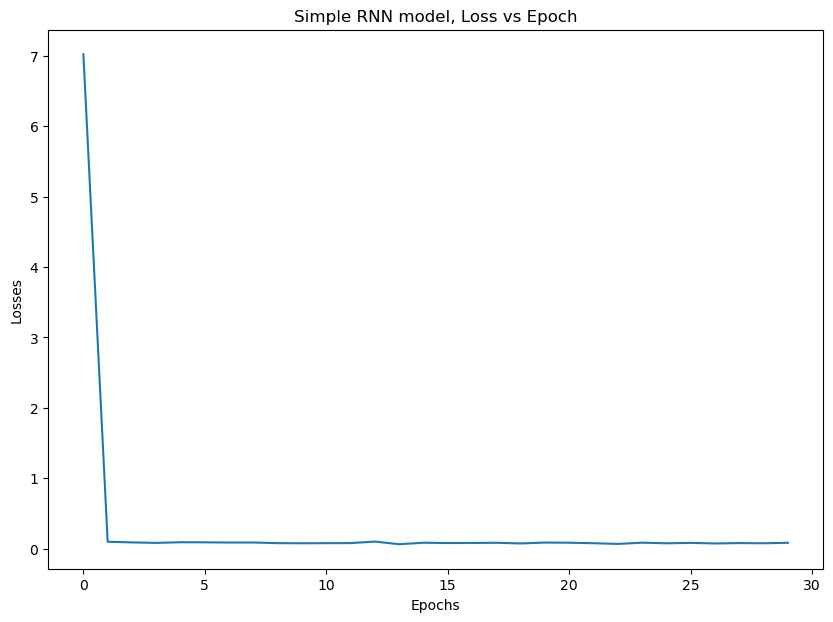

In [93]:
import matplotlib.pyplot as plt
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

### Looking at RMSE

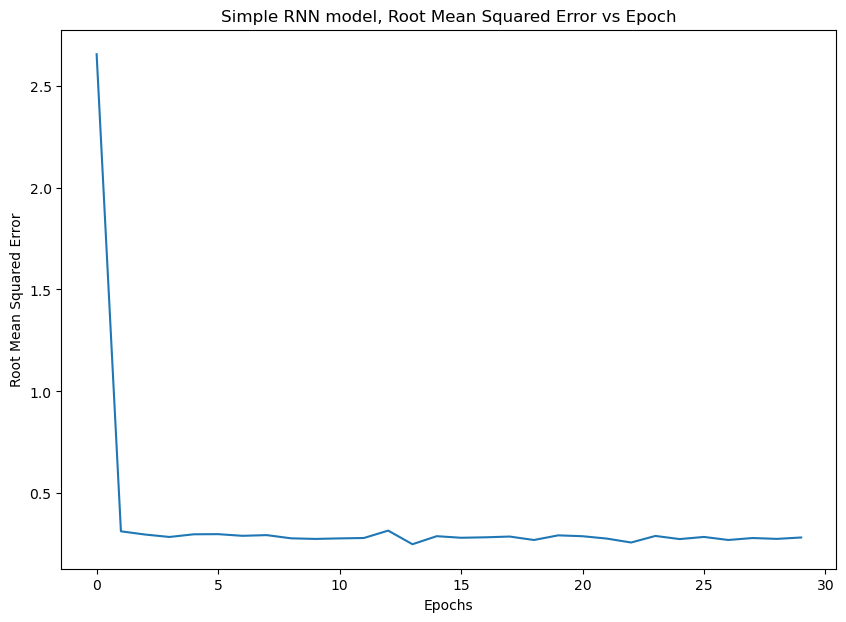

In [94]:
import matplotlib.pyplot as plt
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["root_mean_squared_error"])
plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")
plt.title("Simple RNN model, Root Mean Squared Error vs Epoch")
plt.show()

### Getting predictions

In [98]:
# predictions
y_pred = model.predict(X_train)  

292/292 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [99]:
y_pred

array([[-0.09719227],
       [-0.0872526 ],
       [-0.08753501],
       ...,
       [39.021873  ],
       [39.157883  ],
       [38.955994  ]], dtype=float32)

In [100]:
y_pred.shape

(9318, 1)

In [101]:
y_train

array([[ 0.112723],
       [ 0.114397],
       [ 0.118304],
       ...,
       [41.7925  ],
       [41.5     ],
       [39.775002]])

### Let's compare real with predictions

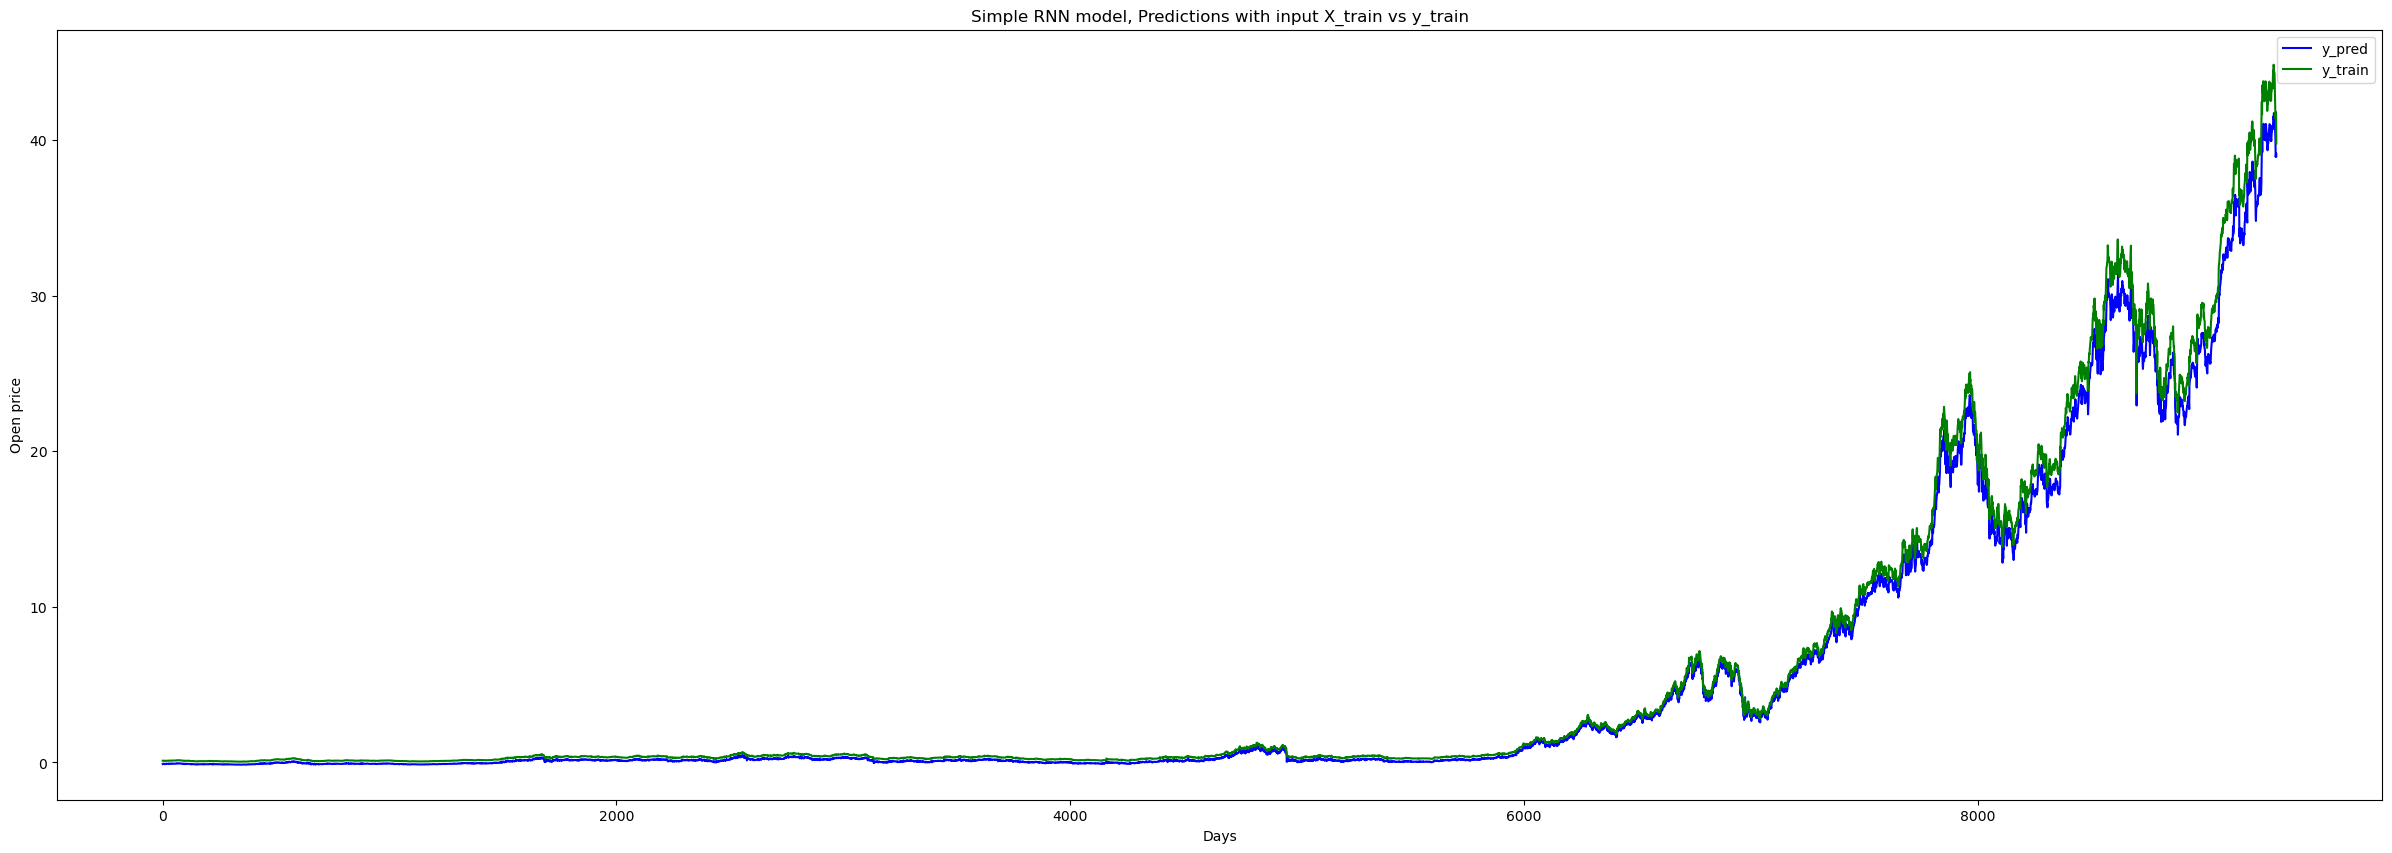

In [102]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

### Too good

![](https://media4.giphy.com/media/xUPGcM225WSUVeLHoY/200w.gif?cid=6c09b95201jdi3nq9ev17ezjdf8ky13voa4icngx95wepp63&ep=v1_gifs_search&rid=200w.gif&ct=g)

### Let's see on our test data

In [103]:
val_data

Date        Open
9368  2018-02-06   38.707500
9369  2018-02-07   40.772499
9370  2018-02-08   40.072498
9371  2018-02-09   39.267502
9372  2018-02-12   39.625000
...          ...         ...
10404 2022-03-18  160.509995
10405 2022-03-21  163.509995
10406 2022-03-22  165.509995
10407 2022-03-23  167.990005
10408 2022-03-24  171.059998

[1041 rows x 2 columns]

### Coverting it to proper shape

In [104]:
val_data['Open']

9368      38.707500
9369      40.772499
9370      40.072498
9371      39.267502
9372      39.625000
            ...    
10404    160.509995
10405    163.509995
10406    165.509995
10407    167.990005
10408    171.059998
Name: Open, Length: 1041, dtype: float64

In [105]:
val_data['Open'].values

array([ 38.7075  ,  40.772499,  40.072498, ..., 165.509995, 167.990005,
       171.059998])

In [107]:
dataset_validation = val_data['Open'].values
dataset_validation

array([ 38.7075  ,  40.772499,  40.072498, ..., 165.509995, 167.990005,
       171.059998])

In [108]:
dataset_validation.shape

(1041,)

In [109]:
dataset_validation.reshape(-1,1)

array([[ 38.7075  ],
       [ 40.772499],
       [ 40.072498],
       ...,
       [165.509995],
       [167.990005],
       [171.059998]])

In [110]:
dataset_validation = dataset_validation.reshape(-1,1)
dataset_validation

array([[ 38.7075  ],
       [ 40.772499],
       [ 40.072498],
       ...,
       [165.509995],
       [167.990005],
       [171.059998]])

### Creating my dataset

In [111]:
# Creating X_test and y_test
X_test = []
y_test = []

time_step = 50

for i in range(time_step, len(dataset_validation)):
    X_test.append(dataset_validation[i-time_step:i,0])
    y_test.append(dataset_validation[i,0])

### Let's have a look

In [112]:
X_test

[array([38.7075  , 40.772499, 40.072498, 39.267502, 39.625   , 40.487499,
        40.759998, 42.447498, 43.09    , 43.012501, 43.2075  , 42.950001,
        43.4175  , 44.087502, 44.775002, 44.814999, 44.634998, 43.200001,
        43.802502, 44.477501, 43.735001, 43.869999, 44.490002, 45.072498,
        45.647499, 45.080002, 44.625   , 44.662498, 44.330002, 43.810001,
        43.759998, 42.5     , 42.0975  , 42.017502, 43.419998, 41.8125  ,
        41.952499, 41.66    , 41.91    , 41.220001, 43.145   , 42.7425  ,
        42.470001, 43.25    , 43.057499, 43.352501, 43.695   , 43.7575  ,
        44.122501, 44.452499]),
 array([40.772499, 40.072498, 39.267502, 39.625   , 40.487499, 40.759998,
        42.447498, 43.09    , 43.012501, 43.2075  , 42.950001, 43.4175  ,
        44.087502, 44.775002, 44.814999, 44.634998, 43.200001, 43.802502,
        44.477501, 43.735001, 43.869999, 44.490002, 45.072498, 45.647499,
        45.080002, 44.625   , 44.662498, 44.330002, 43.810001, 43.759998,
      

In [115]:
y_test

[43.439999,
 42.650002,
 41.7075,
 41.4175,
 40.654999,
 41.029999,
 41.0,
 40.532501,
 41.602501,
 43.807499,
 43.970001,
 44.5625,
 46.294998,
 46.247501,
 46.637501,
 46.935001,
 47.372501,
 47.252499,
 46.695,
 46.517502,
 47.0,
 46.797501,
 47.0,
 47.095001,
 46.587502,
 47.192501,
 47.057499,
 46.900002,
 46.93,
 46.805,
 46.997501,
 47.91,
 48.267502,
 48.407501,
 48.535,
 47.7925,
 47.837502,
 47.8475,
 48.105,
 47.887501,
 47.5075,
 46.970001,
 46.285,
 46.587502,
 46.8125,
 46.529999,
 45.849998,
 45.747501,
 46.307499,
 46.025002,
 46.572498,
 45.955002,
 46.947498,
 46.314999,
 46.355,
 47.375,
 47.677502,
 47.125,
 47.3825,
 47.77,
 47.880001,
 47.4375,
 47.945,
 47.422501,
 47.945,
 47.669998,
 48.112499,
 48.264999,
 48.6525,
 48.747501,
 47.974998,
 47.575001,
 49.782501,
 50.145,
 51.7575,
 52.0,
 52.330002,
 51.512501,
 52.3825,
 51.84,
 52.327499,
 52.540001,
 52.305,
 52.9375,
 53.360001,
 54.525002,
 54.200001,
 53.525002,
 53.662498,
 54.150002,
 54.287498,
 54.75

### Some reshaping is in order

In [116]:
# Checking types
print(type(X_test))
print(type(y_test))

<class 'list'>
<class 'list'>


In [117]:
# Converting to array
X_test = np.array(X_test)
y_test = np.array(y_test)

In [118]:
# Checking types
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [119]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (991, 50)
Shape of y_test before reshape : (991,)


In [120]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [121]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (991, 50, 1)
Shape of y_test before reshape : (991, 1)


### And we are good to go, let' see how it performs

In [122]:
# predictions with X_test data
y_pred_of_test = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [123]:
y_pred_of_test

array([[41.509666],
       [40.938084],
       [40.20527 ],
       [39.234024],
       [38.801407],
       [38.061913],
       [38.342148],
       [38.403023],
       [37.979218],
       [38.877106],
       [40.71498 ],
       [41.176125],
       [41.585934],
       [42.427944],
       [42.609467],
       [42.797005],
       [42.92745 ],
       [43.08598 ],
       [43.090176],
       [42.92681 ],
       [42.829258],
       [42.9563  ],
       [42.92359 ],
       [42.981735],
       [43.020405],
       [42.873764],
       [43.025772],
       [43.017715],
       [42.97415 ],
       [42.971203],
       [42.93123 ],
       [42.981457],
       [43.234203],
       [43.37104 ],
       [43.434834],
       [43.475163],
       [43.322174],
       [43.300423],
       [43.293964],
       [43.352707],
       [43.315758],
       [43.215397],
       [43.042107],
       [42.776657],
       [42.81547 ],
       [42.89353 ],
       [42.823914],
       [42.558685],
       [42.450203],
       [42.635555],


In [124]:
y_test

array([[ 43.439999],
       [ 42.650002],
       [ 41.7075  ],
       [ 41.4175  ],
       [ 40.654999],
       [ 41.029999],
       [ 41.      ],
       [ 40.532501],
       [ 41.602501],
       [ 43.807499],
       [ 43.970001],
       [ 44.5625  ],
       [ 46.294998],
       [ 46.247501],
       [ 46.637501],
       [ 46.935001],
       [ 47.372501],
       [ 47.252499],
       [ 46.695   ],
       [ 46.517502],
       [ 47.      ],
       [ 46.797501],
       [ 47.      ],
       [ 47.095001],
       [ 46.587502],
       [ 47.192501],
       [ 47.057499],
       [ 46.900002],
       [ 46.93    ],
       [ 46.805   ],
       [ 46.997501],
       [ 47.91    ],
       [ 48.267502],
       [ 48.407501],
       [ 48.535   ],
       [ 47.7925  ],
       [ 47.837502],
       [ 47.8475  ],
       [ 48.105   ],
       [ 47.887501],
       [ 47.5075  ],
       [ 46.970001],
       [ 46.285   ],
       [ 46.587502],
       [ 46.8125  ],
       [ 46.529999],
       [ 45.849998],
       [ 45.7

In [125]:
# Checking shape
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (991, 1)


### This is what my model thinks is the output, let's compare and visualise

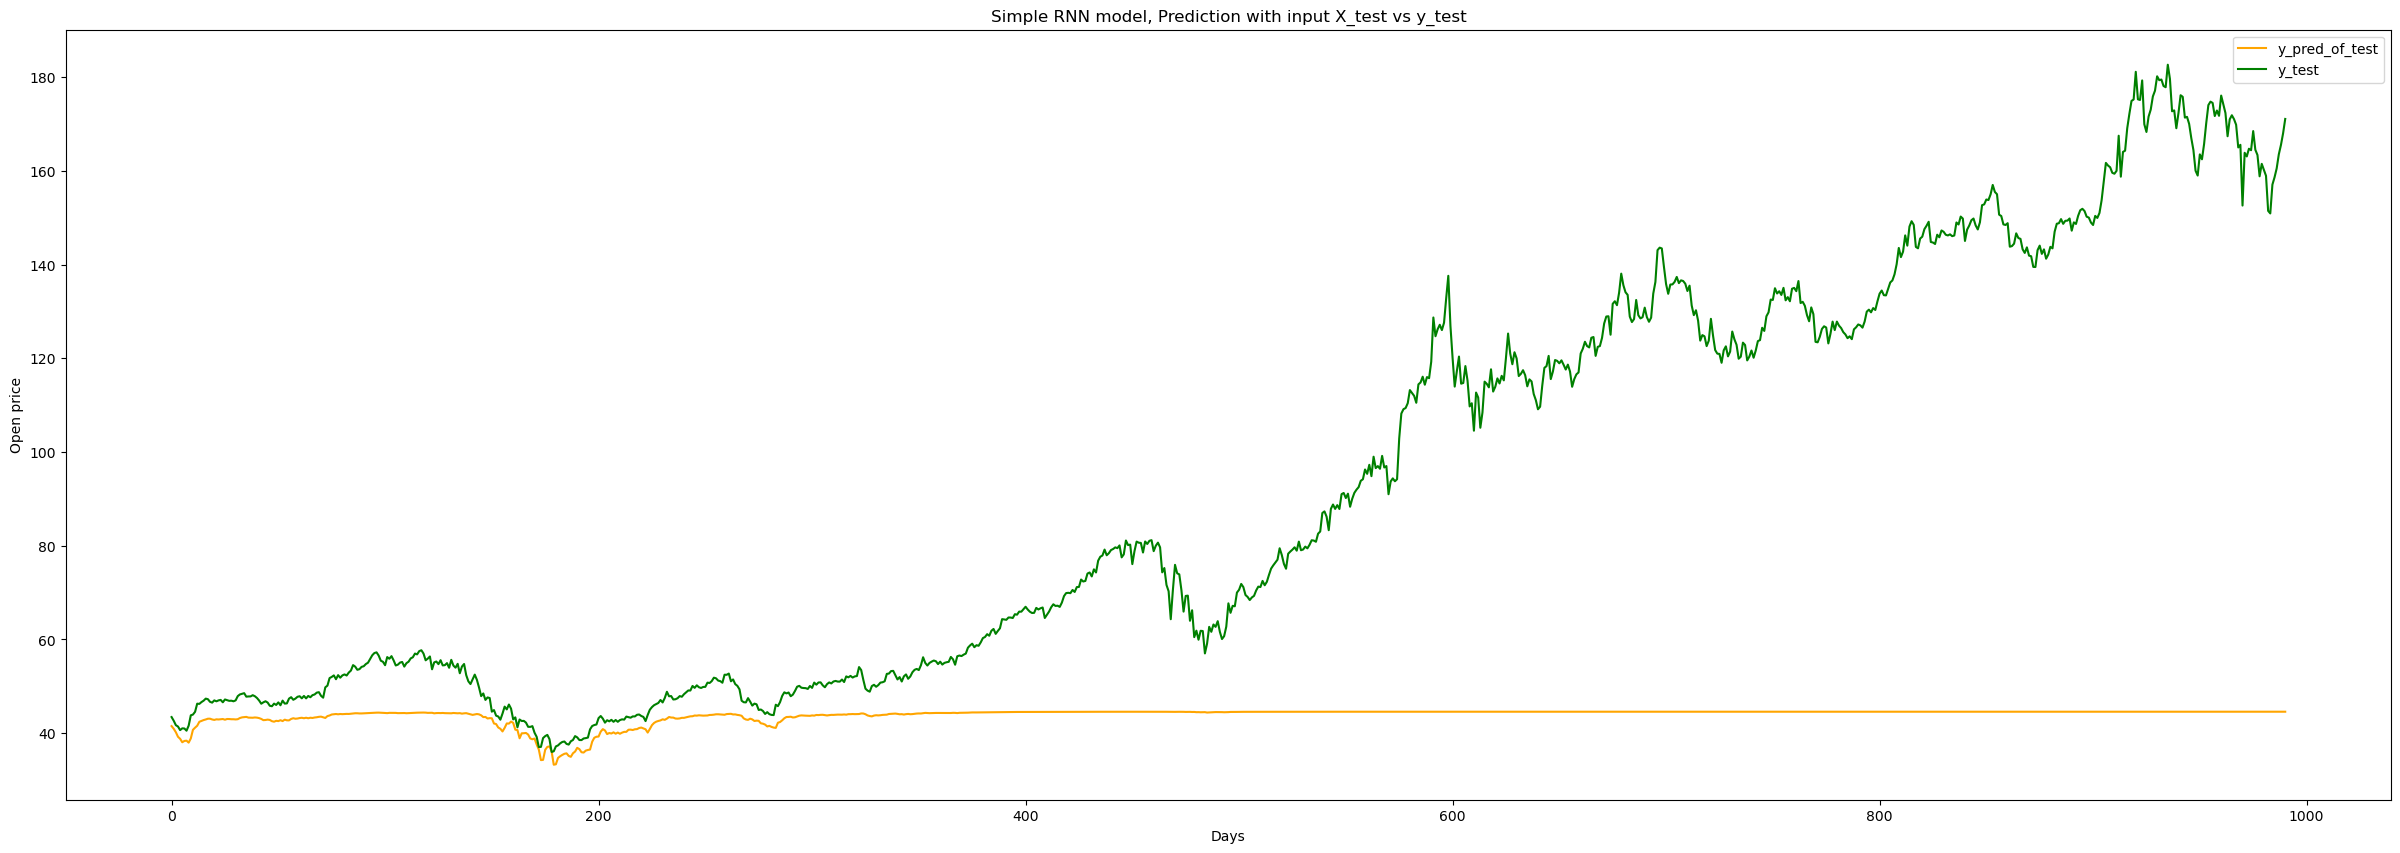

In [126]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(y_test, label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

### Horrible, just garbage
![](https://y.yarn.co/2d473024-473d-4460-9337-eee960e8292a_text.gif)

Maybe we can improve

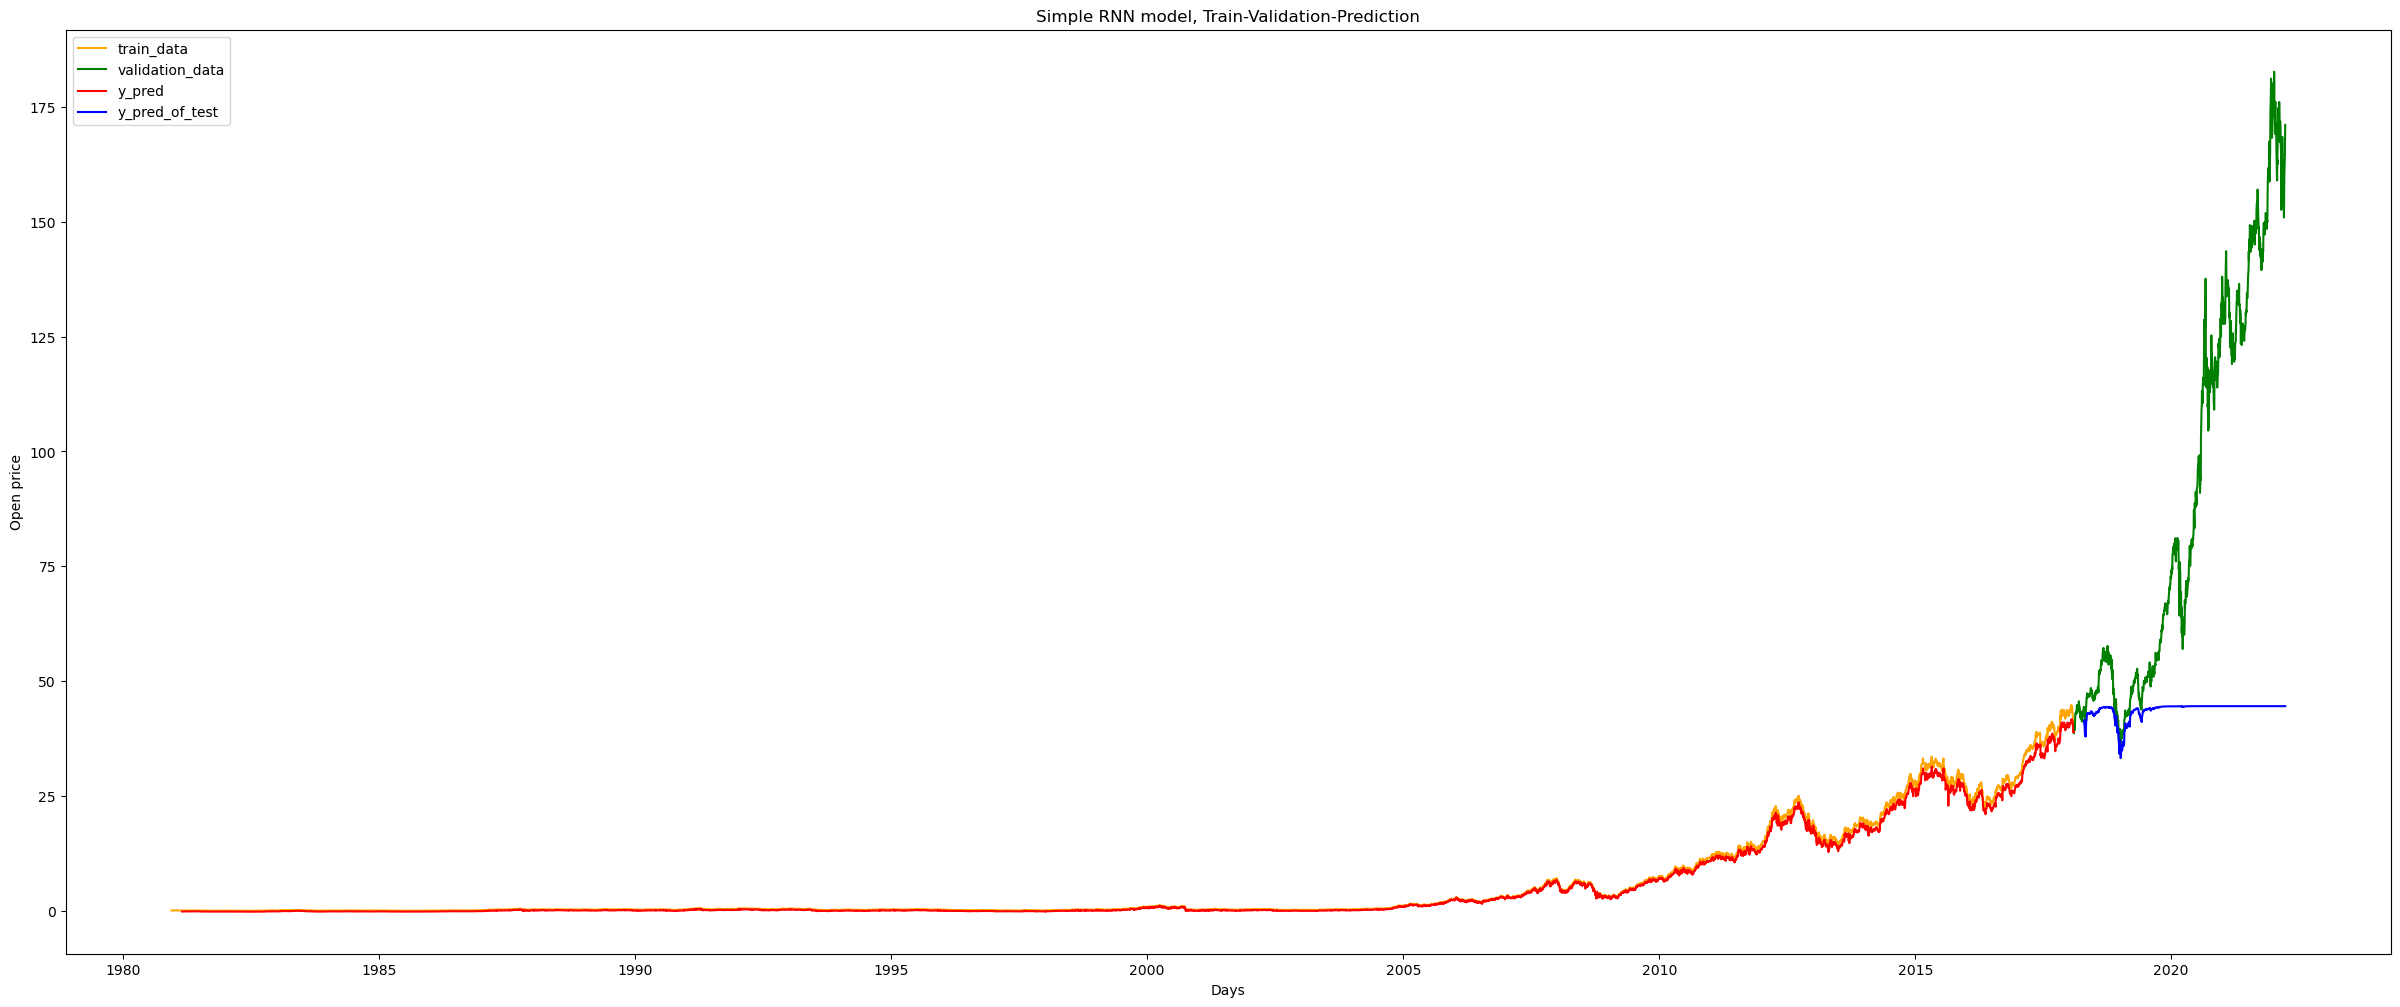

In [128]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "orange")
plt.plot(val_data.Date, val_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(val_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "b")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

### RNN's didn't do the trick, can we do LSTM

In [129]:
from keras.layers import LSTM

# Initialise
model_lstm = Sequential()


# Adding a LSTM layer 
model_lstm.add(
    LSTM(64,
         return_sequences=True,
         input_shape = (X_train.shape[1],1))) #64 lstm neuron block

model_lstm.add(Dropout(0.2))

# Adding another LSTM layer 
model_lstm.add(
    LSTM(64))

model_lstm.add(Dropout(0.2))

# Adding some Dense layers
model_lstm.add(Dense(32))

# Adding my Final Layer
model_lstm.add(Dense(1))

/home/infinity/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
# Compiling my model
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["root_mean_squared_error"])

In [131]:
model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

### Let's fit the model

In [132]:
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 75s 73ms/step - loss: 15.4153 - root_mean_squared_error: 3.5348
Epoch 2/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - loss: 1.2943 - root_mean_squared_error: 1.1302
Epoch 3/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - loss: 1.0447 - root_mean_squared_error: 1.0207
Epoch 4/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - loss: 0.8188 - root_mean_squared_error: 0.9030
Epoch 5/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - loss: 0.8668 - root_mean_squared_error: 0.9300
Epoch 6/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - loss: 0.8489 - root_mean_squared_error: 0.9202
Epoch 7/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - loss: 0.8616 - root_mean_squared_error: 0.9272
Epoch 8/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - loss: 0.7626 - root_mean_squared_error: 0.8728
Epoch 9/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - loss: 0.7453 - root_mean_squared_error: 0.8625
Epoch 10/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - loss: 0.8282 - 

In [133]:
history2.history

{'loss': [4.867990970611572,
  1.0647717714309692,
  1.0242035388946533,
  0.9359040856361389,
  0.9084666967391968,
  0.8484570384025574,
  0.866361141204834,
  0.7882246375083923,
  0.753169596195221,
  0.8307386636734009],
 'root_mean_squared_error': [2.2065465450286865,
  1.0317950248718262,
  1.0120837688446045,
  0.9674900770187378,
  0.9532353281974792,
  0.9211942553520203,
  0.930876612663269,
  0.8879100680351257,
  0.8678173422813416,
  0.9114154577255249]}

### Let's see it's performance

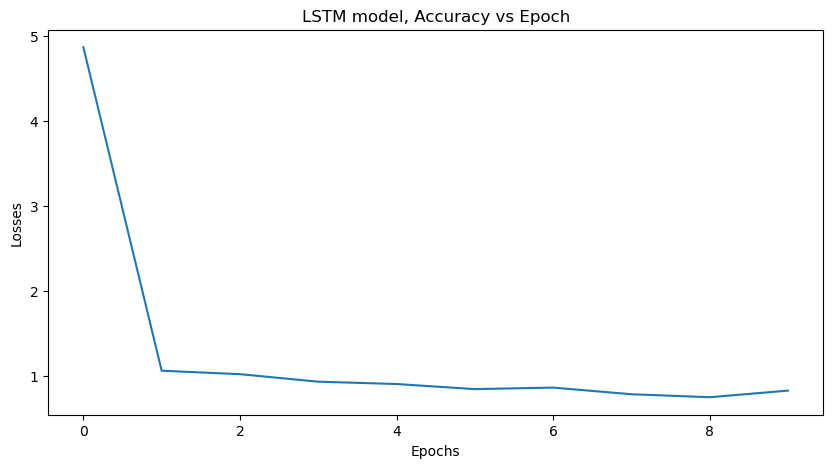

In [134]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

In [135]:
# Getting predictions
predictions_temp = model_lstm.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step


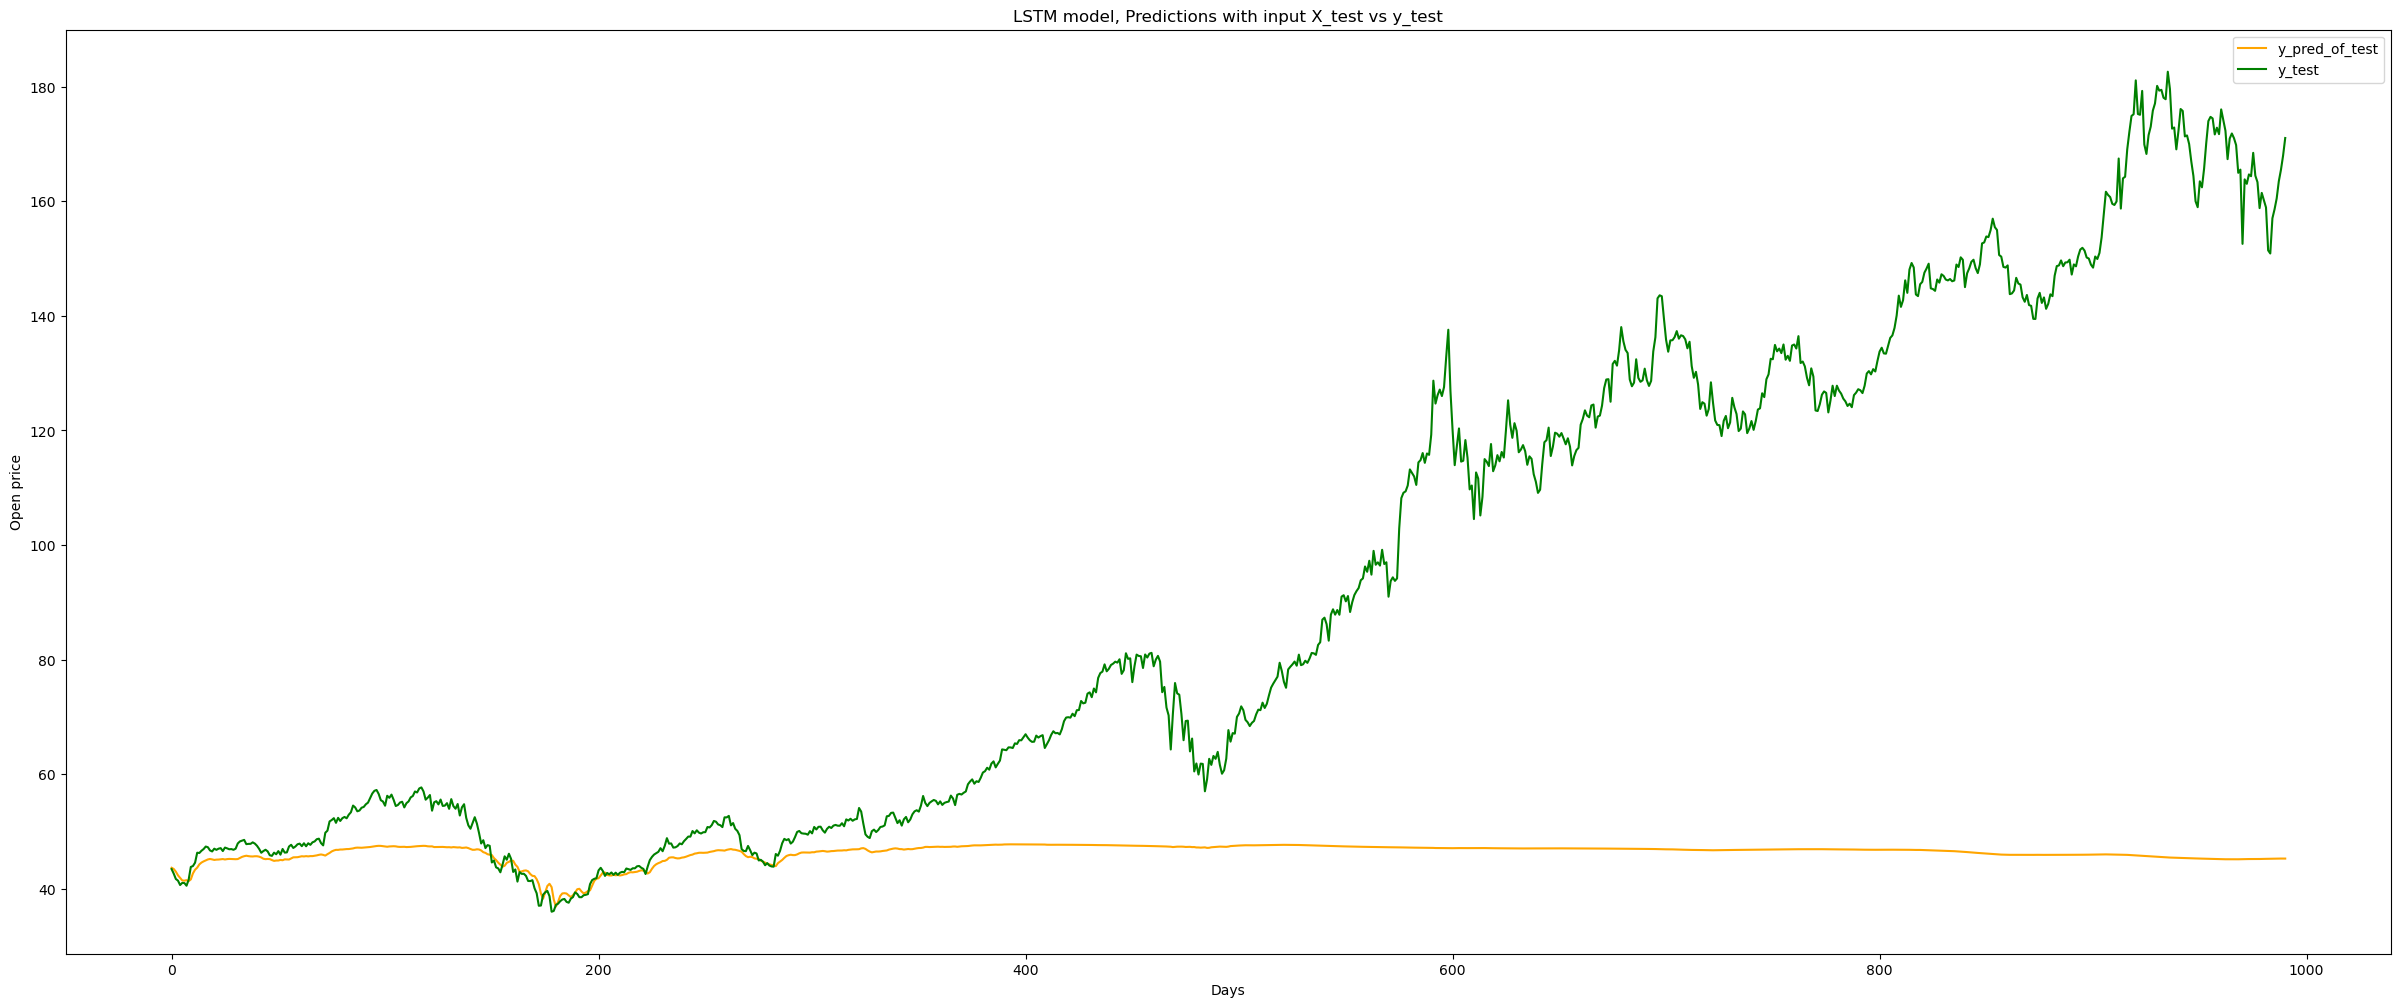

In [138]:
plt.subplots(figsize =(30,12))
plt.plot(predictions_temp, label = "y_pred_of_test", c = "orange" )
plt.plot(y_test, label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

### Let's get future predictions

Let's get tommorow's predictions

In [139]:
df_open

Date        Open
0     1980-12-12    0.128348
1     1980-12-15    0.122210
2     1980-12-16    0.113281
3     1980-12-17    0.115513
4     1980-12-18    0.118862
...          ...         ...
10404 2022-03-18  160.509995
10405 2022-03-21  163.509995
10406 2022-03-22  165.509995
10407 2022-03-23  167.990005
10408 2022-03-24  171.059998

[10409 rows x 2 columns]

In [140]:
df_open.iloc[-1]

Date    2022-03-24 00:00:00
Open             171.059998
Name: 10408, dtype: object

- We can predict the open price for the day after 24/03/2022--> for 25/03/2022.
- We will use last 50 days Open price as input of our model for this prediction
- Let us prepare it:

In [141]:
time_step = 50

df_open.iloc[-time_step:]

Date        Open
10359 2022-01-12  176.119995
10360 2022-01-13  175.779999
10361 2022-01-14  171.339996
10362 2022-01-18  171.509995
10363 2022-01-19  170.000000
10364 2022-01-20  166.979996
10365 2022-01-21  164.419998
10366 2022-01-24  160.020004
10367 2022-01-25  158.979996
10368 2022-01-26  163.500000
10369 2022-01-27  162.449997
10370 2022-01-28  165.710007
10371 2022-01-31  170.160004
10372 2022-02-01  174.009995
10373 2022-02-02  174.750000
10374 2022-02-03  174.479996
10375 2022-02-04  171.679993
10376 2022-02-07  172.860001
10377 2022-02-08  171.729996
10378 2022-02-09  176.050003
10379 2022-02-10  174.139999
10380 2022-02-11  172.330002
10381 2022-02-14  167.369995
10382 2022-02-15  170.970001
10383 2022-02-16  171.850006
10384 2022-02-17  171.029999
10385 2022-02-18  169.820007
10386 2022-02-22  164.979996
10387 2022-02-23  165.539993
10388 2022-02-24  152.580002
10389 2022-02-25  163.839996
10390 2022-02-28  163.059998
10391 2022-03-01  164.699997
10392 2022-03-02  164.389999
10393 2022-03-03  168.470001
10394 2022-03-04  164.490005
10395 2022-03-07  163.360001
10396 2022-03-08  158.820007
10397 2022-03-09  161.479996
10398 2022-03-10  160.199997
10399 2022-03-11  158.929993
10400 2022-03-14  151.449997
10401 2022-03-15  150.899994
10402 2022-03-16  157.050003
10403 2022-03-17  158.610001
10404 2022-03-18  160.509995
10405 2022-03-21  163.509995
10406 2022-03-22  165.509995
10407 2022-03-23  167.990005
10408 2022-03-24  171.059998

In [143]:
df_open.iloc[-time_step:].Open.values

array([176.119995, 175.779999, 171.339996, 171.509995, 170.      ,
       166.979996, 164.419998, 160.020004, 158.979996, 163.5     ,
       162.449997, 165.710007, 170.160004, 174.009995, 174.75    ,
       174.479996, 171.679993, 172.860001, 171.729996, 176.050003,
       174.139999, 172.330002, 167.369995, 170.970001, 171.850006,
       171.029999, 169.820007, 164.979996, 165.539993, 152.580002,
       163.839996, 163.059998, 164.699997, 164.389999, 168.470001,
       164.490005, 163.360001, 158.820007, 161.479996, 160.199997,
       158.929993, 151.449997, 150.899994, 157.050003, 158.610001,
       160.509995, 163.509995, 165.509995, 167.990005, 171.059998])

In [144]:
X_input = df_open.iloc[-time_step:].Open.values

In [145]:
X_input

array([176.119995, 175.779999, 171.339996, 171.509995, 170.      ,
       166.979996, 164.419998, 160.020004, 158.979996, 163.5     ,
       162.449997, 165.710007, 170.160004, 174.009995, 174.75    ,
       174.479996, 171.679993, 172.860001, 171.729996, 176.050003,
       174.139999, 172.330002, 167.369995, 170.970001, 171.850006,
       171.029999, 169.820007, 164.979996, 165.539993, 152.580002,
       163.839996, 163.059998, 164.699997, 164.389999, 168.470001,
       164.490005, 163.360001, 158.820007, 161.479996, 160.199997,
       158.929993, 151.449997, 150.899994, 157.050003, 158.610001,
       160.509995, 163.509995, 165.509995, 167.990005, 171.059998])

In [147]:
# reshaping : converting to 3D array
# Let's reshape
X_input = np.reshape(X_input, (1,50,1))                    

In [148]:
X_input

array([[[176.119995],
        [175.779999],
        [171.339996],
        [171.509995],
        [170.      ],
        [166.979996],
        [164.419998],
        [160.020004],
        [158.979996],
        [163.5     ],
        [162.449997],
        [165.710007],
        [170.160004],
        [174.009995],
        [174.75    ],
        [174.479996],
        [171.679993],
        [172.860001],
        [171.729996],
        [176.050003],
        [174.139999],
        [172.330002],
        [167.369995],
        [170.970001],
        [171.850006],
        [171.029999],
        [169.820007],
        [164.979996],
        [165.539993],
        [152.580002],
        [163.839996],
        [163.059998],
        [164.699997],
        [164.389999],
        [168.470001],
        [164.490005],
        [163.360001],
        [158.820007],
        [161.479996],
        [160.199997],
        [158.929993],
        [151.449997],
        [150.899994],
        [157.050003],
        [158.610001],
        [1

In [149]:
print("Shape of X_input :", X_input.shape)

Shape of X_input : (1, 50, 1)


### Let's get out predictions

### From RNN's 

In [150]:
# Getting predictions
model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[44.58105]], dtype=float32)

In [151]:
# Storing the results
simple_RNN_prediction = model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


### From LSTM's

In [152]:
# Getting predictions
model_lstm.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[45.26992]], dtype=float32)

In [153]:
# Storing predictions
LSTM_prediction = model_lstm.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


### Let's compare

In [154]:
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

Simple RNN, Open price prediction for 3/18/2017      : 44.58105
LSTM prediction, Open price prediction for 3/18/2017 : 45.26992


# But, what about NLP 
How will RNN's and LSTM's be used with text

In [160]:
text = (open("Harry Potter 1 - Sorcerer's Stone.txt").read())
text = text.lower()

In [163]:
text

'harry potter and the sorcerer\'s stone\n\n\nchapter one\n\nthe boy who lived\n\nmr. and mrs. dursley, of number four, privet drive, were proud to say\nthat they were perfectly normal, thank you very much. they were the last\npeople you\'d expect to be involved in anything strange or mysterious,\nbecause they just didn\'t hold with such nonsense.\n\nmr. dursley was the director of a firm called grunnings, which made\ndrills. he was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. mrs. dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors. the dursleys had a small son called dudley and in their\nopinion there was no finer boy anywhere.\n\nthe dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it. they didn\'t\nthink they could bear it if anyone foun

In [164]:
print(text)

harry potter and the sorcerer's stone


chapter one

the boy who lived

mr. and mrs. dursley, of number four, privet drive, were proud to say
that they were perfectly normal, thank you very much. they were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.

mr. dursley was the director of a firm called grunnings, which made
drills. he was a big, beefy man with hardly any neck, although he did
have a very large mustache. mrs. dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors. the dursleys had a small son called dudley and in their
opinion there was no finer boy anywhere.

the dursleys had everything they wanted, but they also had a secret, and
their greatest fear was that somebody would discover it. they didn't
think they could bear it if anyone found out about the potters. mr

###  Cleaning text

In [158]:
# import regex as re
# def clean_text(text):
#     # Convert to lowercase
#     text = text.lower()
    
#     # Remove special characters and digits
#     text = re.sub(r'[^a-z\s]', '', text)
    
#     # Replace multiple spaces with a single space
#     text = re.sub(r'\s+', ' ', text)
    
#     return text

In [162]:
# text_clean = clean_text(text)

# text_clean

### Create character mappings

In [183]:
characters = sorted(list(set(text)))

In [184]:
characters

['\t',
 '\n',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '\\',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '~']

### Let's make a dictionary
Showing letters to numbers and vice versa

In [185]:
n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [186]:
n_to_char

{0: '\t',
 1: '\n',
 2: ' ',
 3: '!',
 4: '"',
 5: "'",
 6: '(',
 7: ')',
 8: '*',
 9: ',',
 10: '-',
 11: '.',
 12: '0',
 13: '1',
 14: '2',
 15: '3',
 16: '4',
 17: '5',
 18: '6',
 19: '7',
 20: '8',
 21: '9',
 22: ':',
 23: ';',
 24: '?',
 25: '\\',
 26: 'a',
 27: 'b',
 28: 'c',
 29: 'd',
 30: 'e',
 31: 'f',
 32: 'g',
 33: 'h',
 34: 'i',
 35: 'j',
 36: 'k',
 37: 'l',
 38: 'm',
 39: 'n',
 40: 'o',
 41: 'p',
 42: 'q',
 43: 'r',
 44: 's',
 45: 't',
 46: 'u',
 47: 'v',
 48: 'w',
 49: 'x',
 50: 'y',
 51: 'z',
 52: '~'}

In [187]:
char_to_n

{'\t': 0,
 '\n': 1,
 ' ': 2,
 '!': 3,
 '"': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 '*': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '0': 12,
 '1': 13,
 '2': 14,
 '3': 15,
 '4': 16,
 '5': 17,
 '6': 18,
 '7': 19,
 '8': 20,
 '9': 21,
 ':': 22,
 ';': 23,
 '?': 24,
 '\\': 25,
 'a': 26,
 'b': 27,
 'c': 28,
 'd': 29,
 'e': 30,
 'f': 31,
 'g': 32,
 'h': 33,
 'i': 34,
 'j': 35,
 'k': 36,
 'l': 37,
 'm': 38,
 'n': 39,
 'o': 40,
 'p': 41,
 'q': 42,
 'r': 43,
 's': 44,
 't': 45,
 'u': 46,
 'v': 47,
 'w': 48,
 'x': 49,
 'y': 50,
 'z': 51,
 '~': 52}

We have used character level mappings and not word mappings. 

### Preparing the data for model structure in Keras

In [188]:
# extracted sequences
X = []   
# the target: follow up character for each sequence in X
Y = []   

In [189]:
length = len(text)
length

439742

In [190]:
seq_length = 100

for i in range(0, length - seq_length, 1):
    # Creating my X as 100 letters
    sequence = text[i:i + seq_length]
    # Creating my y as the letter that comes after my 100 letters
    label = text[i + seq_length]
    
    # Storing my X
    X.append([char_to_n[char] for char in sequence])
    # Storing my y
    Y.append(char_to_n[label])
    
print('Number of extracted sequences:', len(X))

Number of extracted sequences: 439642


### An explanation

In [176]:
text[0:100]

"harry potter and the sorcerer's stone\n\n\nchapter one\n\nthe boy who lived\n\nmr. and mrs. dursley, of num"

In [177]:
text[0 + 100]

'b'

In [178]:
text

'harry potter and the sorcerer\'s stone\n\n\nchapter one\n\nthe boy who lived\n\nmr. and mrs. dursley, of number four, privet drive, were proud to say\nthat they were perfectly normal, thank you very much. they were the last\npeople you\'d expect to be involved in anything strange or mysterious,\nbecause they just didn\'t hold with such nonsense.\n\nmr. dursley was the director of a firm called grunnings, which made\ndrills. he was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. mrs. dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors. the dursleys had a small son called dudley and in their\nopinion there was no finer boy anywhere.\n\nthe dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it. they didn\'t\nthink they could bear it if anyone foun

### Let's see our data

In [195]:
print(X[0])

[33, 26, 43, 43, 50, 2, 41, 40, 45, 45, 30, 43, 2, 26, 39, 29, 2, 45, 33, 30, 2, 44, 40, 43, 28, 30, 43, 30, 43, 5, 44, 2, 44, 45, 40, 39, 30, 1, 1, 1, 28, 33, 26, 41, 45, 30, 43, 2, 40, 39, 30, 1, 1, 45, 33, 30, 2, 27, 40, 50, 2, 48, 33, 40, 2, 37, 34, 47, 30, 29, 1, 1, 38, 43, 11, 2, 26, 39, 29, 2, 38, 43, 44, 11, 2, 29, 46, 43, 44, 37, 30, 50, 9, 2, 40, 31, 2, 39, 46, 38]


In [194]:
Y[0]

27

In [196]:
text[0:101]

"harry potter and the sorcerer's stone\n\n\nchapter one\n\nthe boy who lived\n\nmr. and mrs. dursley, of numb"

### We now have our X train and Y train

```seq_length``` is the length of the sequence of characters that we want to consider before predicting a particular character.

```
+--------------+-------+
|      X       |   Y   |
+--------------+-------+
| [h, e, l, l] | [o]   |
| [e, l, l, o] | [ ]   |
| [l, l, o,  ] | [i]   |
| [l, o,  , i] | [n]   |
| ...          | ...   |
+--------------+-------+
```

### Required format

Now, RNN's/LSTMs accept input in the form of (```number_of_sequences```, ```length_of_sequence```, ```number_of_features```) which is not the current format of the arrays. Also, we need to transform the array Y into a one-hot encoded format.

In [201]:
# Reshaping into appropriate format
X_modified = np.reshape(X, (len(X), seq_length, 1))

# What's going on here, what are you doing
# I am normalising
X_modified = X_modified / float(len(characters))

In [202]:
X_modified

array([[[0.62264151],
        [0.49056604],
        [0.81132075],
        ...,
        [0.73584906],
        [0.86792453],
        [0.71698113]],

       [[0.49056604],
        [0.81132075],
        [0.81132075],
        ...,
        [0.86792453],
        [0.71698113],
        [0.50943396]],

       [[0.81132075],
        [0.81132075],
        [0.94339623],
        ...,
        [0.71698113],
        [0.50943396],
        [0.56603774]],

       ...,

       [[0.73584906],
        [0.75471698],
        [0.8490566 ],
        ...,
        [0.56603774],
        [0.03773585],
        [0.56603774]],

       [[0.75471698],
        [0.8490566 ],
        [0.03773585],
        ...,
        [0.03773585],
        [0.56603774],
        [0.73584906]],

       [[0.8490566 ],
        [0.03773585],
        [0.49056604],
        ...,
        [0.56603774],
        [0.73584906],
        [0.54716981]]])

In [203]:
X_modified[0].shape

(100, 1)

In [204]:
from tensorflow.keras.utils import to_categorical

Y_modified = to_categorical(Y)

In [205]:
Y_modified

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Training 

In [208]:
# Initialise my model
model = Sequential()


# Add a RNN layer of size 10
model.add(SimpleRNN(50, 
                    input_shape=(X_modified.shape[1], X_modified.shape[2]), 
                    return_sequences=True))

model.add(Dropout(0.2))

# Adding 1 more RNN layer
model.add(SimpleRNN(10))

model.add(Dropout(0.2))

model.add(Dense(53, activation='softmax'))

/home/infinity/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [209]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [210]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 100, 50)        │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 10)             │           610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 53)             │           583 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,793 (14.82 KB)

 Trainable params: 3,793 (14.82 KB)

 Non-trainable params: 0 (0.00 B)

Training .............

In [211]:
model.fit(X_modified, Y_modified, epochs=10, batch_size=128)

Epoch 1/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 326s 93ms/step - loss: 3.1500
Epoch 2/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 314s 91ms/step - loss: 2.8757
Epoch 3/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 247s 72ms/step - loss: 2.8419
Epoch 4/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 181s 53ms/step - loss: 2.8221
Epoch 5/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 152s 44ms/step - loss: 2.8120
Epoch 6/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 139s 40ms/step - loss: 2.8002
Epoch 7/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 146s 42ms/step - loss: 2.7950
Epoch 8/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 139s 40ms/step - loss: 2.7922
Epoch 9/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 137s 40ms/step - loss: 2.7825
Epoch 10/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 132s 38ms/step - loss: 2.7813


### Generate some text using random seeds of text

In [212]:
#random row from the X array
start = 10   
string_mapped = list(X[start])
full_string = [n_to_char[value] for value in string_mapped]

In [214]:
print(string_mapped)

[30, 43, 2, 26, 39, 29, 2, 45, 33, 30, 2, 44, 40, 43, 28, 30, 43, 30, 43, 5, 44, 2, 44, 45, 40, 39, 30, 1, 1, 1, 28, 33, 26, 41, 45, 30, 43, 2, 40, 39, 30, 1, 1, 45, 33, 30, 2, 27, 40, 50, 2, 48, 33, 40, 2, 37, 34, 47, 30, 29, 1, 1, 38, 43, 11, 2, 26, 39, 29, 2, 38, 43, 44, 11, 2, 29, 46, 43, 44, 37, 30, 50, 9, 2, 40, 31, 2, 39, 46, 38, 27, 30, 43, 2, 31, 40, 46, 43, 9, 2]


In [217]:
print(full_string)

['e', 'r', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', ' ', 's', 'o', 'r', 'c', 'e', 'r', 'e', 'r', "'", 's', ' ', 's', 't', 'o', 'n', 'e', '\n', '\n', '\n', 'c', 'h', 'a', 'p', 't', 'e', 'r', ' ', 'o', 'n', 'e', '\n', '\n', 't', 'h', 'e', ' ', 'b', 'o', 'y', ' ', 'w', 'h', 'o', ' ', 'l', 'i', 'v', 'e', 'd', '\n', '\n', 'm', 'r', '.', ' ', 'a', 'n', 'd', ' ', 'm', 'r', 's', '.', ' ', 'd', 'u', 'r', 's', 'l', 'e', 'y', ',', ' ', 'o', 'f', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'f', 'o', 'u', 'r', ',', ' ']


In [219]:
print(' '.join(full_string))

e r   a n d   t h e   s o r c e r e r ' s   s t o n e 
 
 
 c h a p t e r   o n e 
 
 t h e   b o y   w h o   l i v e d 
 
 m r .   a n d   m r s .   d u r s l e y ,   o f   n u m b e r   f o u r ,  


### Generating Text

In [220]:
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))

    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])

    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [221]:
string_mapped

[2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30,
 2,
 45,
 33,
 30]

In [224]:
' '.join([n_to_char.get(i) for i in string_mapped])

'  t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e   t h e'

### But, what about LSTM's 

Will they do better

In [225]:
# Initialising a model
model_lstm_text = Sequential()

# Adding LSTM layers
model_lstm_text.add(LSTM(50, 
               input_shape=(X_modified.shape[1], X_modified.shape[2]), 
               return_sequences=True))

# Adding dropout to prevent overfitting
model_lstm_text.add(Dropout(0.2))

# Adding LSTM layer
model_lstm_text.add(LSTM(10))

# Adding dropout to prevent overfitting
model_lstm_text.add(Dropout(0.2))

model_lstm_text.add(Dense(Y_modified.shape[1], activation='softmax'))

/home/infinity/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [226]:
model_lstm_text.compile(loss='categorical_crossentropy', optimizer='adam')

In [227]:
model_lstm_text.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 53)             │           583 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,423 (52.43 KB)

 Trainable params: 13,423 (52.43 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
model_lstm_text.fit(X_modified, Y_modified, epochs=10, batch_size=128)

Epoch 1/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 297s 86ms/step - loss: 3.1652
Epoch 2/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 314s 91ms/step - loss: 2.9852
Epoch 3/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 342s 99ms/step - loss: 2.8950
Epoch 4/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 319s 93ms/step - loss: 2.8563
Epoch 5/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 313s 91ms/step - loss: 2.8254
Epoch 6/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 308s 90ms/step - loss: 2.8491
Epoch 7/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 308s 90ms/step - loss: 2.7898
Epoch 8/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 309s 90ms/step - loss: 2.7484
Epoch 9/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 308s 90ms/step - loss: 2.7231
Epoch 10/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 309s 90ms/step - loss: 2.7033


### Generate some text using random seeds of text

In [233]:
#random row from the X array
start = 20   
string_mapped = list(X[start])
full_string = [n_to_char[value] for value in string_mapped]

In [234]:
print(string_mapped)

[2, 44, 40, 43, 28, 30, 43, 30, 43, 5, 44, 2, 44, 45, 40, 39, 30, 1, 1, 1, 28, 33, 26, 41, 45, 30, 43, 2, 40, 39, 30, 1, 1, 45, 33, 30, 2, 27, 40, 50, 2, 48, 33, 40, 2, 37, 34, 47, 30, 29, 1, 1, 38, 43, 11, 2, 26, 39, 29, 2, 38, 43, 44, 11, 2, 29, 46, 43, 44, 37, 30, 50, 9, 2, 40, 31, 2, 39, 46, 38, 27, 30, 43, 2, 31, 40, 46, 43, 9, 2, 41, 43, 34, 47, 30, 45, 2, 29, 43, 34]


In [235]:
print(full_string)

[' ', 's', 'o', 'r', 'c', 'e', 'r', 'e', 'r', "'", 's', ' ', 's', 't', 'o', 'n', 'e', '\n', '\n', '\n', 'c', 'h', 'a', 'p', 't', 'e', 'r', ' ', 'o', 'n', 'e', '\n', '\n', 't', 'h', 'e', ' ', 'b', 'o', 'y', ' ', 'w', 'h', 'o', ' ', 'l', 'i', 'v', 'e', 'd', '\n', '\n', 'm', 'r', '.', ' ', 'a', 'n', 'd', ' ', 'm', 'r', 's', '.', ' ', 'd', 'u', 'r', 's', 'l', 'e', 'y', ',', ' ', 'o', 'f', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'f', 'o', 'u', 'r', ',', ' ', 'p', 'r', 'i', 'v', 'e', 't', ' ', 'd', 'r', 'i']


In [236]:
print(' '.join(full_string))

  s o r c e r e r ' s   s t o n e 
 
 
 c h a p t e r   o n e 
 
 t h e   b o y   w h o   l i v e d 
 
 m r .   a n d   m r s .   d u r s l e y ,   o f   n u m b e r   f o u r ,   p r i v e t   d r i


### Generating Text

In [237]:
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))

    pred_index = np.argmax(model_lstm_text.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])

    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [238]:
string_mapped

[2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30,
 2,
 45,
 40,
 30,
 45,
 2,
 45,
 40,
 2,
 45,
 33,
 30]

In [239]:
' '.join([n_to_char.get(i) for i in string_mapped])

'  t h e   t o e t   t o   t h e   t o e t   t o   t h e   t o e t   t o   t h e   t o e t   t o   t h e   t o e t   t o   t h e   t o e t   t o   t h e   t o e t   t o   t h e   t o e t   t o   t h e'

![](https://media3.giphy.com/media/nu2sosGi62vheDZEIa/200w.gif?cid=6c09b9526gi3zagn4zgvqsqu9rsl3uuyh448fwbh02ph01zd&ep=v1_gifs_search&rid=200w.gif&ct=g)

<h1><center>Not Good at all !!!</center></h1>

### But
We do have a very small model and an even smaller training data, make them both bigger and you get results such as these 

### Some real life examples

I downloaded all the works of Shakespeare and concatenated them into a single (4.4MB) file. We can now afford to train a larger network, in this case lets try a 3-layer RNN with 512 hidden nodes on each layer. After we train the network for a few hours we obtain samples such as:

-------

<span style="color:red">

PANDARUS:
Alas, I think he shall be come approached and the day
When little srain would be attain'd into being never fed,
And who is but a chain and subjects of his death,
I should not sleep.

Second Senator:
They are away this miseries, produced upon my soul,
Breaking and strongly should be buried, when I perish
The earth and thoughts of many states.

DUKE VINCENTIO:
Well, your wit is in the care of side and that.

Second Lord:
They would be ruled after this chamber, and
my fair nues begun out of the fact, to be conveyed,
Whose noble souls I'll have the heart of the wars.

Clown:
Come, sir, I will make did behold your worship.

VIOLA:
I'll drink it.

</span>


------------



Remember, all the RNN knows are characters, so in particular it samples both speaker’s names and the contents. Sometimes we also get relatively extented monologue passages, such as:

-----------

<span style="color:red">

VIOLA:
Why, Salisbury must find his flesh and thought
That which I am not aps, not a man and in fire,
To show the reining of the raven and the wars
To grace my hand reproach within, and not a fair are hand,
That Caesar and my goodly father's world;
When I was heaven of presence and our fleets,
We spare with hours, but cut thy council I am great,
Murdered and by thy master's ready there
My power to give thee but so much as hell:
Some service in the noble bondman here,
Would show him to her wine.

KING LEAR:
O, if you were a feeble sight, the courtesy of your law,
Your sight and several breath, will wear the gods
With his heads, and my hands are wonder'd at the deeds,
So drop upon your lordship's head, and your opinion
Shall be against your honour.

    
</span>

--------

### Wikipedia

We saw that the LSTM can learn to spell words and copy general syntactic structures. Lets further increase the difficulty and train on structured markdown. In particular, lets take the Hutter Prize 100MB dataset of raw Wikipedia and train an LSTM. Following Graves et al., I used the first 96MB for training, the rest for validation and ran a few models overnight. We can now sample Wikipedia articles! Below are a few fun excerpts. First, some basic markdown output:

<span style="color:red">


Naturalism and decision for the majority of Arab countries' capitalide was grounded
by the Irish language by [[John Clair]], [[An Imperial Japanese Revolt]], associated 
with Guangzham's sovereignty. His generals were the powerful ruler of the Portugal 
in the [[Protestant Immineners]], which could be said to be directly in Cantonese 
Communication, which followed a ceremony and set inspired prison, training. The 
emperor travelled back to [[Antioch, Perth, October 25|21]] to note, the Kingdom 
of Costa Rica, unsuccessful fashioned the [[Thrales]], [[Cynth's Dajoard]], known 
in western [[Scotland]], near Italy to the conquest of India with the conflict. 
Copyright was the succession of independence in the slop of Syrian influence that 
was a famous German movement based on a more popular servicious, non-doctrinal 
and sexual power post. Many governments recognize the military housing of the 
[[Civil Liberalization and Infantry Resolution 265 National Party in Hungary]], 
that is sympathetic to be to the [[Punjab Resolution]]
(PJS)[http://www.humah.yahoo.com/guardian.
cfm/7754800786d17551963s89.htm Official economics Adjoint for the Nazism, Montgomery 
was swear to advance to the resources for those Socialism's rule, 
was starting to signing a major tripad of aid exile.]]
    
    
</span>

In case you were wondering, the yahoo url above doesn’t actually exist, the model just hallucinated it. Also, note that the model learns to open and close the parenthesis correctly. There’s also quite a lot of structured markdown that the model learns, for example sometimes it creates headings, lists, etc.:

```
{ { cite journal | id=Cerling Nonforest Department|format=Newlymeslated|none } }
''www.e-complete''.

'''See also''': [[List of ethical consent processing]]

== See also ==
*[[Iender dome of the ED]]
*[[Anti-autism]]

===[[Religion|Religion]]===
*[[French Writings]]
*[[Maria]]
*[[Revelation]]
*[[Mount Agamul]]

== External links==
* [http://www.biblegateway.nih.gov/entrepre/ Website of the World Festival. The labour of India-county defeats at the Ripper of California Road.]

==External links==
* [http://www.romanology.com/ Constitution of the Netherlands and Hispanic Competition for Bilabial and Commonwealth Industry (Republican Constitution of the Extent of the Netherlands)]
```

Sometimes the model snaps into a mode of generating random but valid XML:

```
<page>
  <title>Antichrist</title>
  <id>865</id>
  <revision>
    <id>15900676</id>
    <timestamp>2002-08-03T18:14:12Z</timestamp>
    <contributor>
      <username>Paris</username>
      <id>23</id>
    </contributor>
    <minor />
    <comment>Automated conversion</comment>
    <text xml:space="preserve">#REDIRECT [[Christianity]]</text>
  </revision>
</page>
```

The model completely makes up the timestamp, id, and so on. Also, note that it closes the correct tags appropriately and in the correct nested order. Here are 100,000 characters of sampled wikipedia if you’re interested to see more.